<a href="https://colab.research.google.com/github/adsferreira/rf-dert_object_detection_tutorial/blob/main/hto_ifsp_minicurso_rf_detr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verificaremos se há uma GPU NVidia para processar o RF-DETR:

In [1]:
!nvidia-smi

Thu Jun  5 13:01:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Instalaremos o pacote RF-DETR versão 1.1.0 utilizando o PIP, um gerenciador de pacotes de software do Python.

In [2]:
!pip install -q rfdetr==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

# Para iniciarmos nossos testes, baixaremos duas figuras disponíveis no repositório do Roboflow contendo cachorros:

In [3]:
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg

# Agora detectaremos objetos em uma imagem fornecida:

Loading pretrain weights


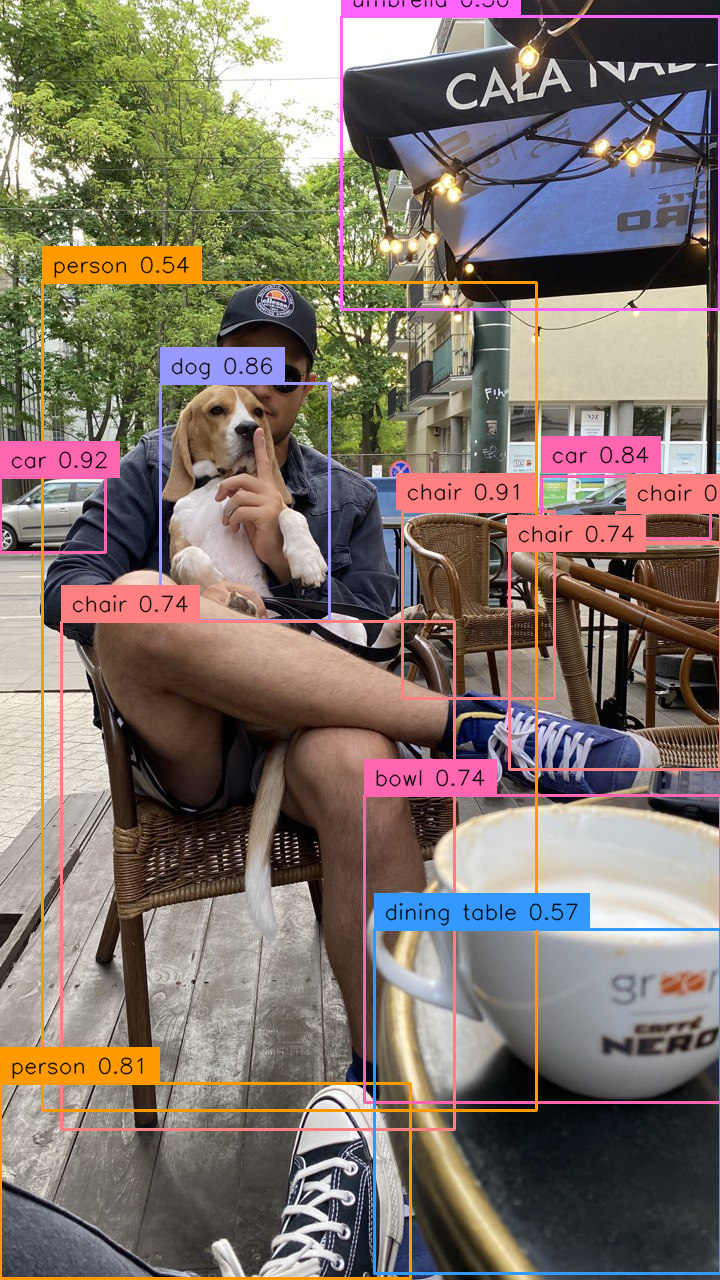

In [7]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv
import numpy as np
from PIL import Image

image = Image.open("dog-3.jpeg")

model = RFDETRBase()
detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image

# Vamos entender linha a linha do código acima:

# 1. Importando Bibliotecas Necessárias:
    
*   `from rfdetr import RFDETRBase`

    Importa a classe RFDETRBase da biblioteca rfdetr, que é um modelo pré-treinado de detecção de objetos  variante do DETR, um modelo baseado em transformers.

*   `from rfdetr.util.coco_classes import COCO_CLASSES`

    Importa COCO_CLASSES, uma lista com os nomes das classes do dataset COCO (um dataset padrão para detecção de objetos com 80 classes, como "pessoa", "cachorro", etc.).

*   `import supervision as sv`
    
    Importa a biblioteca supervision (sv), que fornece ferramentas para visualizar e processar resultados de detecção de objetos (como desenhar caixas delimitadoras, rótulos, etc.).

*   `import numpy as np`

    Importa a biblioteca numpy para operações numéricas (embora não seja usada diretamente neste código).

*   `from PIL import Image`

    Importa o módulo Image da biblioteca Pillow (PIL) para carregar e manipular imagens.

# 2. Carregando a Imagem de Entrada:

*   `image = Image.open("dog-3.jpeg")`

  Abre a imagem "dog-3.jpeg" usando o método Image.open() do Pillow e armazena-a na variável *image*.

# 3. Carregando o Modelo e Executando a Detecção:

* ```
model = RFDETRBase()
detections = model.predict(image, threshold=0.5)
```

# 4. Configurando Parâmetros de Visualização:

* `color = sv.ColorPalette.from_hex([...])`
    
Define uma paleta de cores personalizada (12 cores em hexadecimal) para desenhar caixas e rótulos.

* `text_scale = sv.calculate_optimal_text_scale(...)`

Calcula o tamanho ideal do texto dos rótulos com base nas dimensões da imagem (image.size).

* `thickness = sv. calculate_optimal_line_thickness(...)`

Calcula a espessura ideal das linhas das caixas delimitadoras com base nas dimensões da imagem.

# 5. Configurando Anotadores:

* `bbox_annotator = sv.BoxAnnotator(...)`

Inicializa um anotador de caixas delimitadoras com a paleta de cores e espessura definidas.

* `label_annotator = sv.LabelAnnotator(...)`
    
    Inicializa um anotador de rótulos com:

* A mesma paleta de cores para o fundo do rótulo.

* Cor do texto preta (sv.Color.BLACK).

* Tamanho de texto calculado automaticamente (text_scale).

* smart_position=True para evitar sobreposição de rótulos.

# 6. Gerando Rótulos para as Detecções:

* Cria uma lista de rótulos no formato: "<nome_da_classe> <score_de_confiança>" (ex.: "cachorro 0.95").

* COCO_CLASSES[class_id] obtém o nome da classe no dataset COCO.

* confidence:.2f formata o *score* de confiança com 2 casas decimais.

# 7. Anotando a Imagem:

* `annotated_image = image.copy()`

Cria uma cópia da imagem original para não modificá-la diretamente.

* `bbox_annotator.annotate(...)`
    
Desenha as caixas delimitadoras na imagem com base nas detecções.

* `label_annotator.annotate(...)`

Adiciona os rótulos (nome da classe + confiança) às caixas delimitadoras.

# Agora realizaremos detecção em vídeos usando o RF-DETR:

In [9]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv

model = RFDETRBase()

#
def callback(frame, index):
    annotated_frame = frame.copy()

    detections = model.predict(annotated_frame, threshold = 0.6)

    labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
    ]

    annotated_frame = sv.BoxAnnotator().annotate(annotated_frame, detections)
    annotated_frame = sv.LabelAnnotator().annotate(annotated_frame, detections, labels)
    return annotated_frame

sv.process_video(
    source_path = "ski.mp4",
    target_path = "ski_rf_detection.mp4",
    callback = callback,
)

Loading pretrain weights


O código para detecção de objetos em vídeos apresenta pouca diferença comparado ao código que detecta objetos em imagens. A diferença principal é a introdução do método *process_video* presente na biblioteca *supervision*. Este método recebe os seguintes parâmetros de entrada:
  
* source_path: Vídeo de entrada ( neste caso, o arquivo "ski.mp4").

* target_path: Vídeo de saída com os objetos detectados ( neste caso, o arquivo "ski_rf_detection.mp4").

* callback: Função aplicada para cada imagem ou *frame* (aqui, a função callback executa a detecção + anotação).

Vale notar que diferente do exemplo com a deteção em uma imagem apenas, o exemplo para detecção em vídeos utiliza as configurações padrão dos anotadores (sem cor e expessura de caixa de deteção customizados).